In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

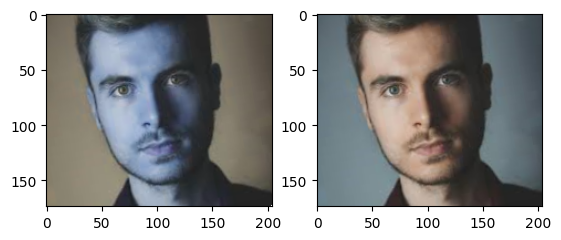

In [59]:
img_path = 'C:/Users/hakan/Jupyter Notebook/data/aiffel/'
img_bgr = cv2.imread(img_path+'face2.png')
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img_bgr)
plt.subplot(122)
plt.imshow(img_rgb)
plt.show()

In [3]:
detector_hog = dlib.get_frontal_face_detector()

In [4]:
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(24, 24) (153, 153)]]


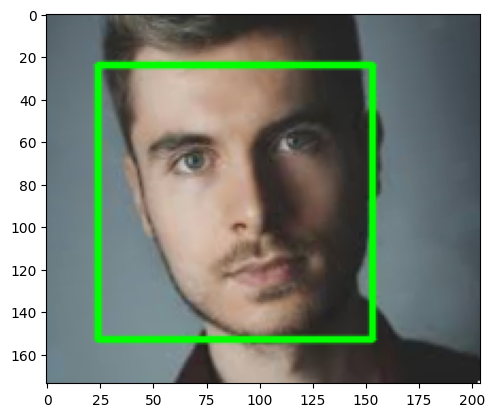

In [5]:
print(dlib_rects)

for spot in dlib_rects:
    l = spot.left()
    t = spot.top()
    r = spot.right()
    b = spot.bottom()

    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2,lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
landmark_predictor = dlib.shape_predictor('C:/Users/hakan/Jupyter Notebook/data/shape_predictor_68_face_landmarks.dat')
# !bzip2 -d ../data/shape_predictor_68_face_landmarks.dat.bz2

In [7]:
def get_landmarks(rgb_image,dlib_rectangles):
    list_landmarks=[]

    for rects in dlib_rectangles:
        points = landmark_predictor(rgb_image,rects)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    return list_landmarks

In [8]:
list_landmarks = get_landmarks(img_rgb,dlib_rects)

In [9]:
len(list_landmarks)

1

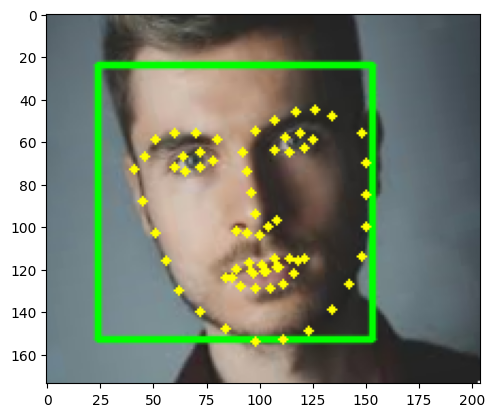

In [11]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show,point,2,(0,255,255),-1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [151]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[28])
    x = landmark[28][0]
    y = landmark[28][1]
    w = h = dlib_rect.width()
    print(x,y)
    print(w,h)

(94, 74)
94 74
130 130


In [152]:
sticker_path = 'C:/Users/hakan/Jupyter Notebook/data/aiffel/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker,(w,h//3))
print(img_sticker.shape)
img_show = img_bgr.copy()

(43, 130, 3)


In [153]:
refined_x = x-w//2
refined_y = y
print(refined_x,refined_y)

29 74


In [154]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (29,74)


In [155]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==[255, 255, 255],sticker_area,img_sticker)


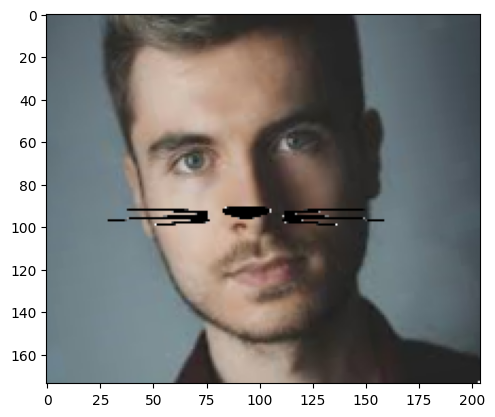

In [156]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [212]:
img_sticker2 = cv2.imread(sticker_path)
img_sticker2 = cv2.resize(img_sticker,(w,h//3))

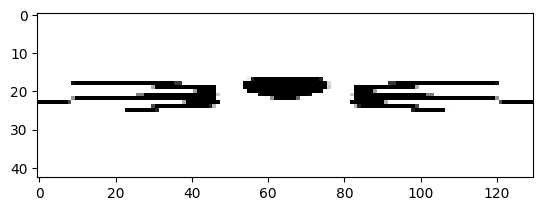

In [213]:
plt.imshow(img_sticker2)

In [214]:
blank_image = np.zeros((img_rgb.shape[0],img_rgb.shape[1],img_rgb.shape[2]), np.uint8)
blank_image[:,:] = (255,255,255)

In [201]:
# blank_image = cv2.resize(blank_image,(w,h))/

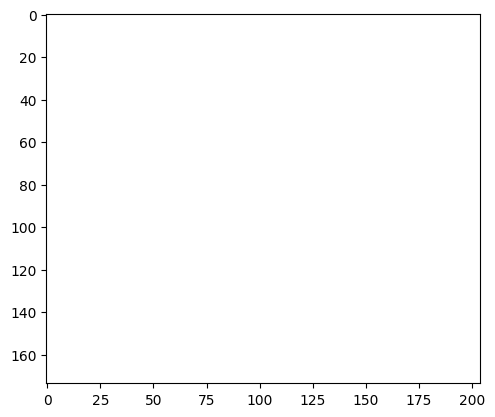

In [215]:
plt.imshow(blank_image)

In [216]:
img_sticker2.shape, blank_image.shape

((43, 130, 3), (174, 204, 3))

In [217]:
blank_area = blank_image[refined_y:refined_y+img_sticker2.shape[0], refined_x:refined_x+img_sticker2.shape[1]]
blank_image[refined_y:refined_y+img_sticker2.shape[0], refined_x:refined_x+img_sticker2.shape[1]] = np.where(img_sticker2==[255, 255, 255],blank_area,img_sticker2)

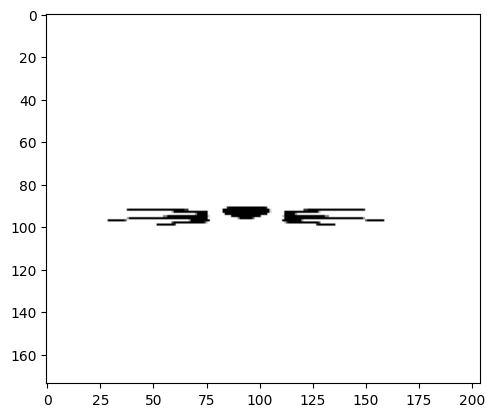

In [270]:
plt.imshow(blank_image)

In [320]:
add_img = cv2.addWeighted(img_rgb,1,blank_image,0.05,0)

In [163]:
img_rgb.shape , img_sticker2.shape

((174, 204, 3), (130, 130, 3))

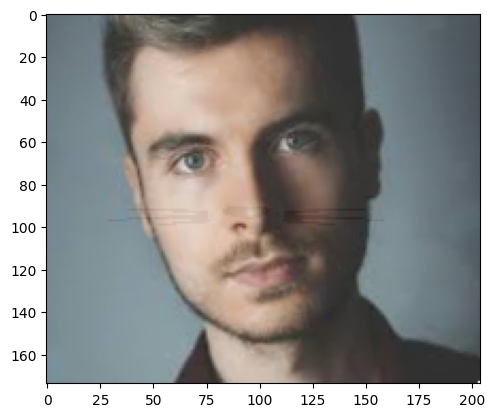

In [269]:
plt.imshow(add_img)

In [ ]:
# cv2.getRotationMatrix2D(center, angle, scale)/

In [442]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[28])
    x = landmark[28][0]
    y = landmark[28][1]
    w = h = dlib_rect.width()
    print(x,y)
    print(w,h)
sticker_path = 'C:/Users/hakan/Jupyter Notebook/data/aiffel/cat_whiskers.png'
deco_cuty = cv2.imread(sticker_path,-1)
deco_cuty = cv2.resize(img_sticker,(w,h//3))
img = img_rgb

(94, 74)
94 74
130 130


In [443]:
blank_image = np.zeros((img_rgb.shape[0],img_rgb.shape[1],img_rgb.shape[2]), np.uint8)
blank_image[:,:] = (255,255,255)

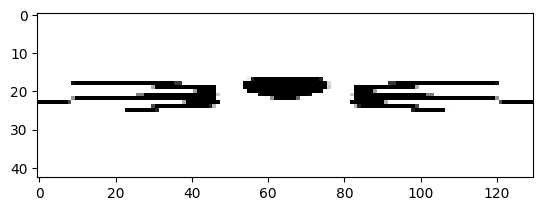

In [444]:
plt.imshow(deco_cuty)

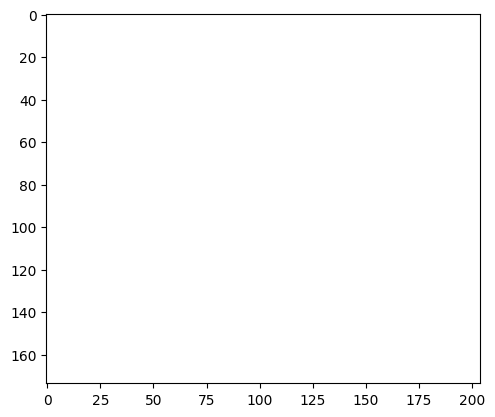

In [445]:
plt.imshow(blank_image)

In [446]:
print(img.shape,deco_cuty.shape)

(174, 204, 3) (43, 130, 3)


In [ ]:
# # 이미지의 크기를 잡고 이미지의 중심을 계산합니다.
# (h, w) = cv2_image.shape[:2]
# (cX, cY) = (w // 2, h // 2)

# # 이미지의 중심을 중심으로 이미지를 45도 회전합니다.
# M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
# rotated_45 = cv2.warpAffine(cv2_image, M, (w, h))

# # 이미지를 중심으로 -90도 회전
# M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
# rotated_90 = cv2.warpAffine(cv2_image, M, (w, h))

# img_show(["Rotated by 45 Degrees", "Rotated by -90 Degrees"], [rotated_45, rotated_90])

In [447]:
(height,width)=blank_image.shape[:2]
center = (x,y)

In [448]:
a=landmark[35][0]-landmark[31][0]
b=landmark[31][1]-landmark[35][1]
print(a,b)
import math
angle = math.atan(b/a)*180/math.pi

19 5


In [449]:
blank_area = blank_image[refined_y:refined_y+deco_cuty.shape[0], refined_x:refined_x+deco_cuty.shape[1]]
blank_image[refined_y:refined_y+deco_cuty.shape[0], refined_x:refined_x+deco_cuty.shape[1]] = np.where(deco_cuty==[255, 255, 255],blank_area,deco_cuty)

In [450]:
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(blank_image, M, (width, height))

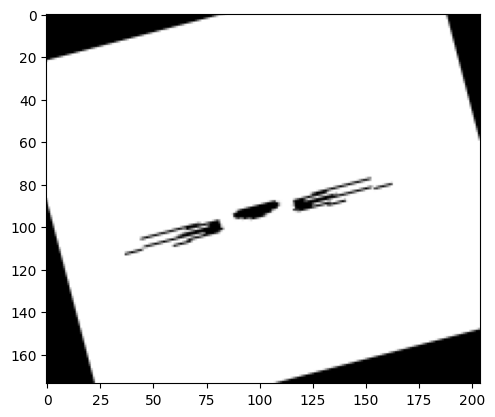

In [452]:
plt.imshow(rotated_image)

In [ ]:
img[x-(w+h//6):]

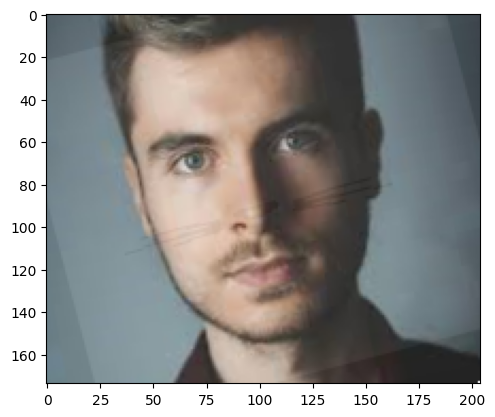

In [467]:
added_img = cv2.addWeighted(img,1,rotated_image,0.05,0)
plt.imshow(added_img)

In [ ]:
def get_dlib_rects(img,path1,path2):
    img = cv2.imread(img_path)


In [ ]:
def get_rotated_img(img):


In [468]:
path1 = 'C:/Users/hakan/Jupyter Notebook/data/aiffel/face2.png'
path2 = 'C:/Users/hakan/Jupyter Notebook/data/aiffel/cat_whiskers.png'